In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2RvbmFsZGhhbGUvRG9jdW1lbnRzL0lBQU1ML01MQm9vaw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749746015.7416215, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749746015.7570558, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749746013.3245404, "/opt/anaconda3/lib/python3.13/codecs.py": 1749746012.57125, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749746014.1131392, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749746014.1056273, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749746014.921781, "/opt/anaconda3/lib/python3.13/abc.py": 1749746012.4960408, "/opt/anaconda3/lib/python3.13/io.py": 1749746012.8010643, "/opt/anaconda3/lib/python3.13/stat.py": 1749746013.1405113, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749746012.3873768, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749746012.7239525, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749746012.9542572, "/opt/anaconda3/lib/python3.13/os.py": 1749746012.9050896, "/opt/anaconda3/lib/python3.13/_sitebuiltin

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
seed = 12345
np.random.seed(seed)

# Load Ames dataset
ames = fetch_openml(name="house_prices", as_frame=True)
df = ames.frame

# Feature selection matching R version
features = [
    'BedroomAbvGr', 'YearBuilt', 'MoSold', 'LotArea', 'Street', 'CentralAir',
    '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'Fireplaces',
    'GarageArea', 'GrLivArea', 'TotRmsAbvGrd'
]
df = df[features + ['SalePrice']].dropna()

# Encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Train/test split
train, test = train_test_split(df, test_size=0.3, random_state=seed)

# Add random variable for variable-importance baseline
train['random'] = np.random.randn(len(train))
test['random'] = np.random.randn(len(test))

X_train = train.drop(columns=['SalePrice'])
y_train = train['SalePrice']
X_test = test.drop(columns=['SalePrice'])
y_test = test['SalePrice']

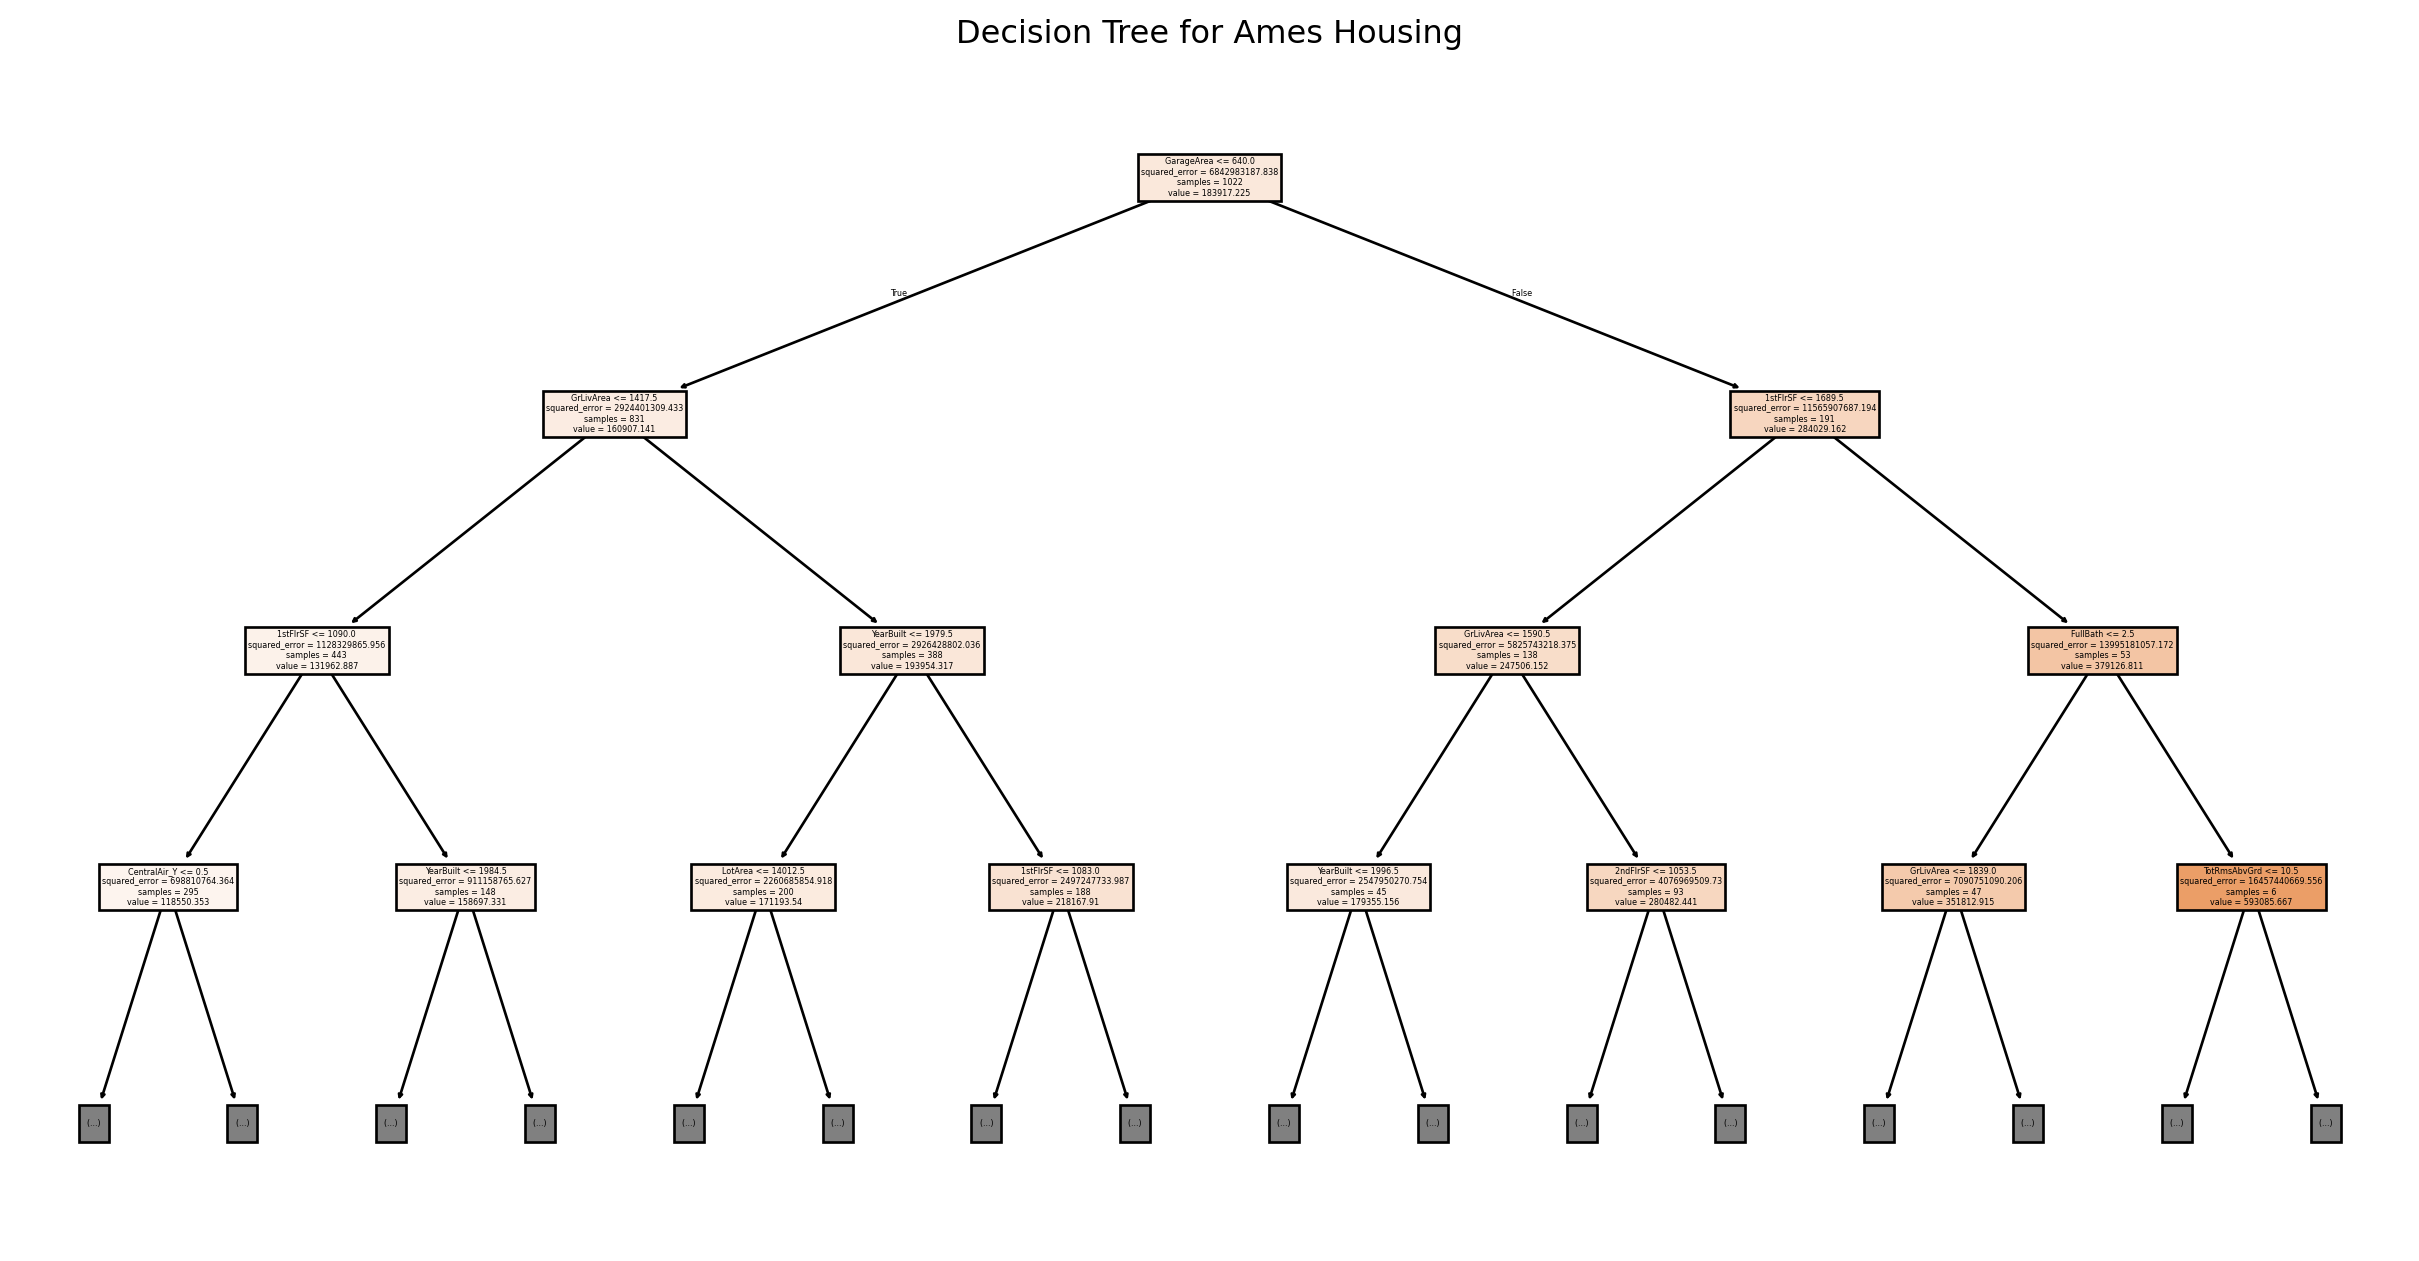

,Model,RMSE,MAE,MAPE,R2
0,Decision Tree,2.378377e+09,28465.348099,17.701235,0.522975


In [3]:
tree = DecisionTreeRegressor(random_state=seed, max_depth=5)
tree.fit(X_train, y_train)

plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("Decision Tree for Ames Housing")
plt.show()

# Metrics
pred_tree = tree.predict(X_test)
rmse_tree = mean_squared_error(y_test, pred_tree)
mae_tree = mean_absolute_error(y_test, pred_tree)
mape_tree = np.mean(np.abs((y_test - pred_tree) / y_test)) * 100
r2_tree = r2_score(y_test, pred_tree)

pd.DataFrame([["Decision Tree", rmse_tree, mae_tree, mape_tree, r2_tree]],
             columns=["Model", "RMSE", "MAE", "MAPE", "R2"])

Best Random Forest Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 4, 'max_depth': 20}


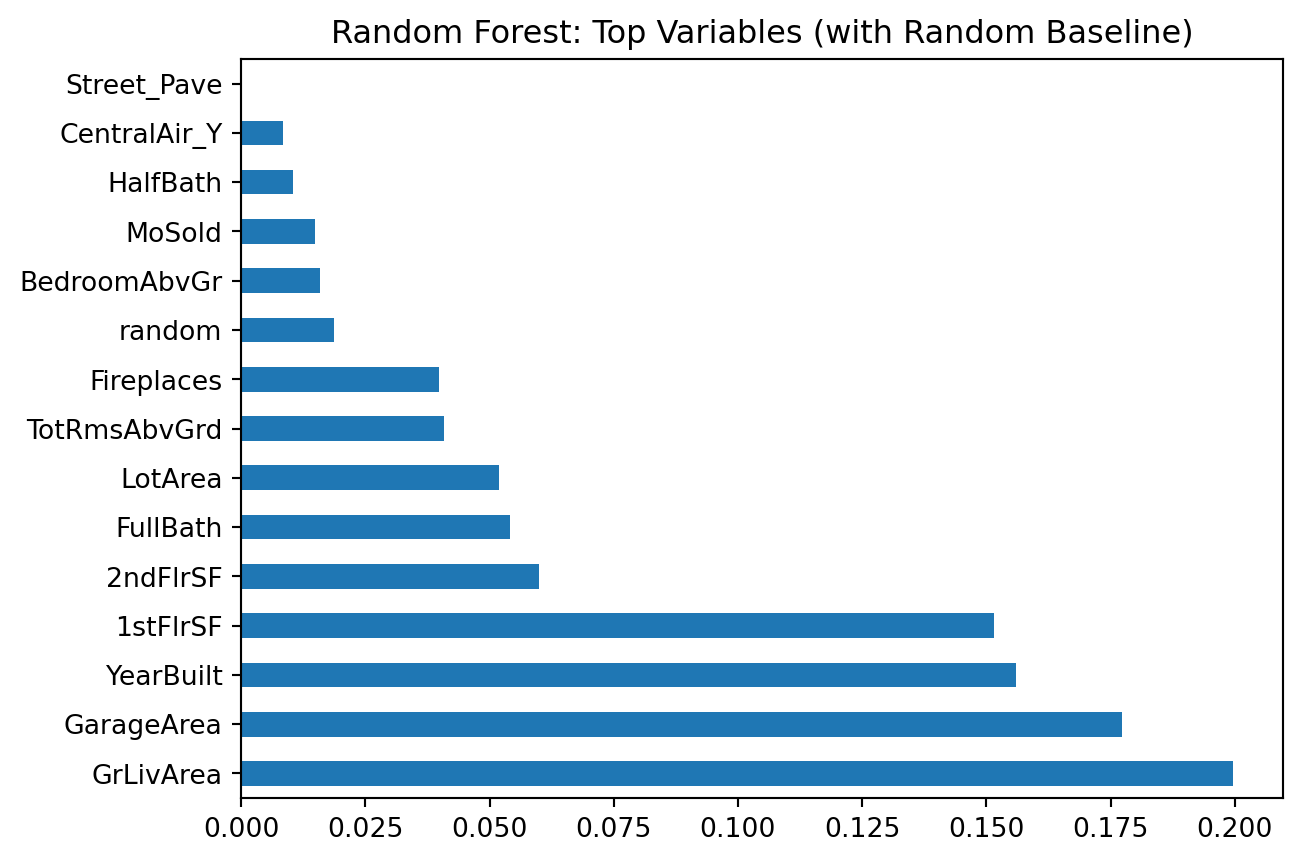

<Figure size 672x480 with 0 Axes>

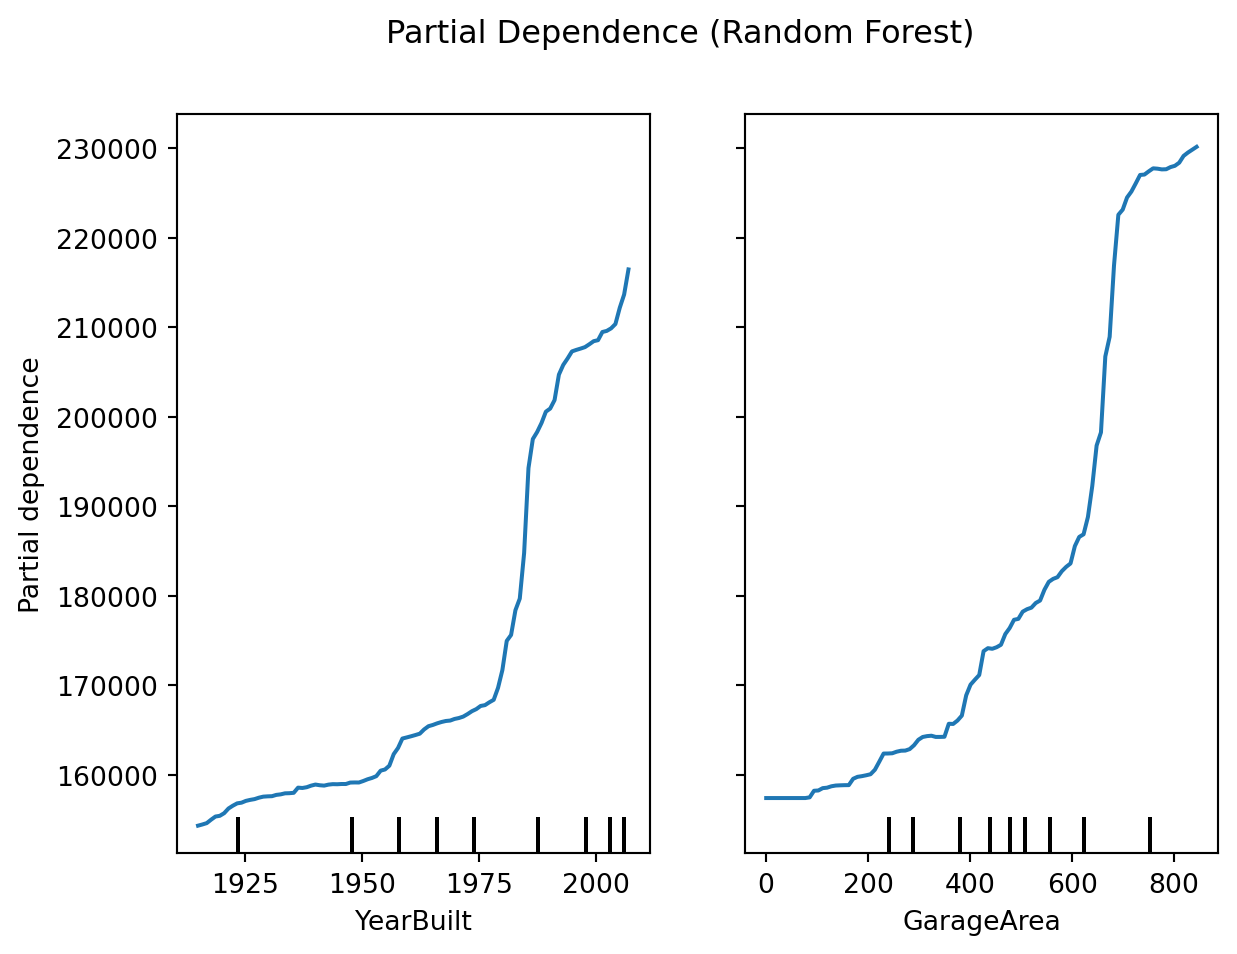

,Model,RMSE,MAE,MAPE,R2
0,Random Forest (Tuned),1.093313e+09,19889.772151,12.832756,0.780717


In [4]:
rf = RandomForestRegressor(random_state=seed)

# Define parameter grid (similar to R tuning)
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None, 4, 6, 8],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

cv = KFold(n_splits=10, shuffle=True, random_state=seed)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=cv,
    random_state=seed,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

rf_random.fit(X_train, y_train)
rf_best = rf_random.best_estimator_
print("Best Random Forest Parameters:", rf_random.best_params_)

# Importance with random variable
importances = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances[:15].plot(kind='barh', title='Random Forest: Top Variables (with Random Baseline)')
plt.show()

# Partial dependence plots
plt.figure()
PartialDependenceDisplay.from_estimator(rf_best, X_train, ['YearBuilt', 'GarageArea'])
plt.suptitle("Partial Dependence (Random Forest)")
plt.show()

# Performance metrics
pred_rf = rf_best.predict(X_test)
rmse_rf = mean_squared_error(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)
mape_rf = np.mean(np.abs((y_test - pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, pred_rf)

pd.DataFrame([["Random Forest (Tuned)", rmse_rf, mae_rf, mape_rf, r2_rf]],
             columns=["Model", "RMSE", "MAE", "MAPE", "R2"])

Best XGBoost Parameters: {'subsample': 0.75, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


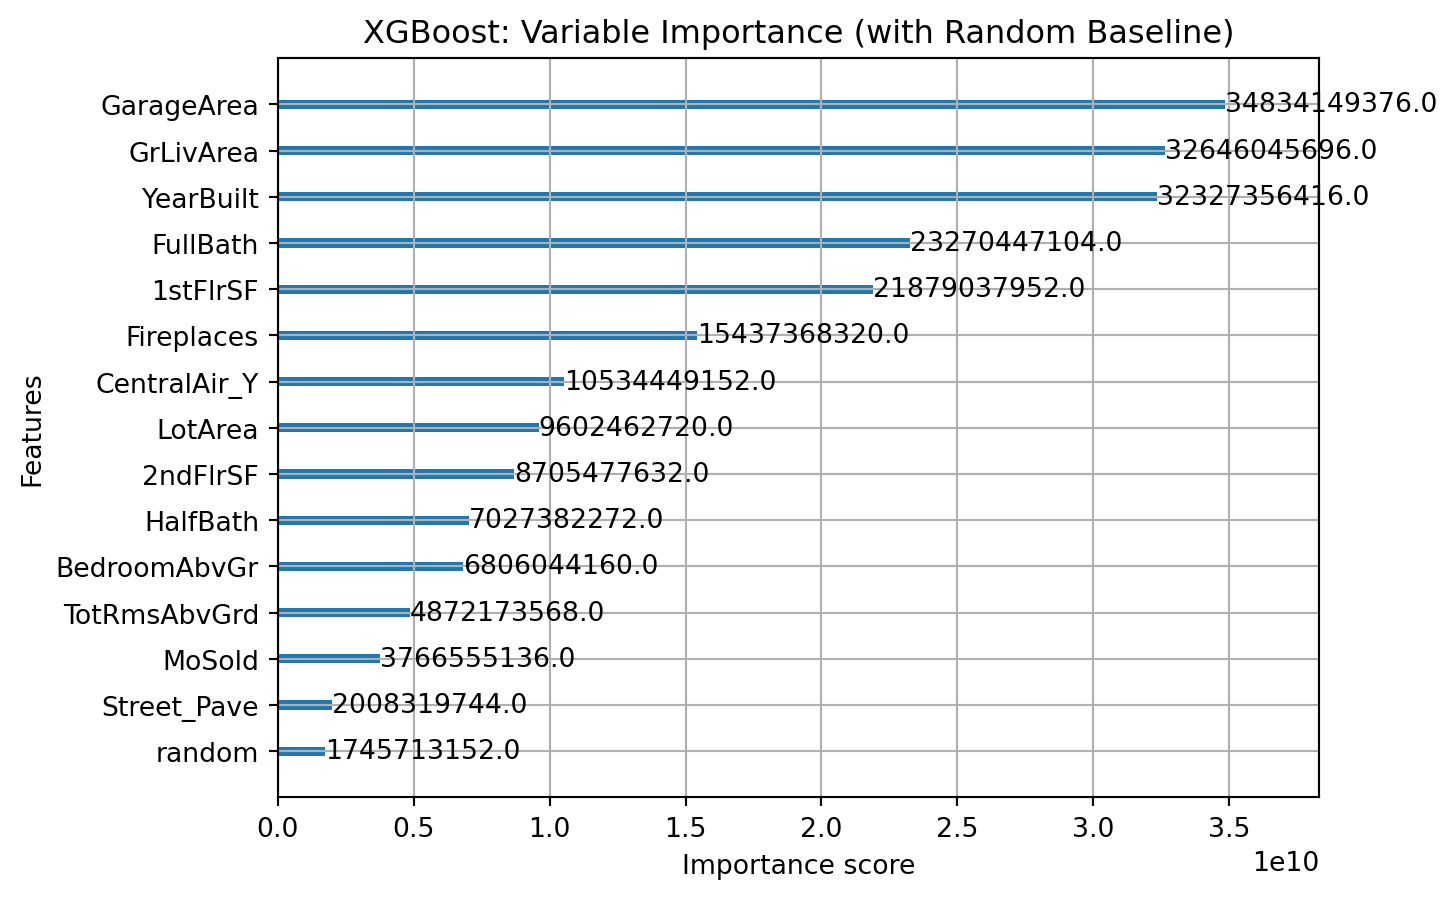

<Figure size 672x480 with 0 Axes>

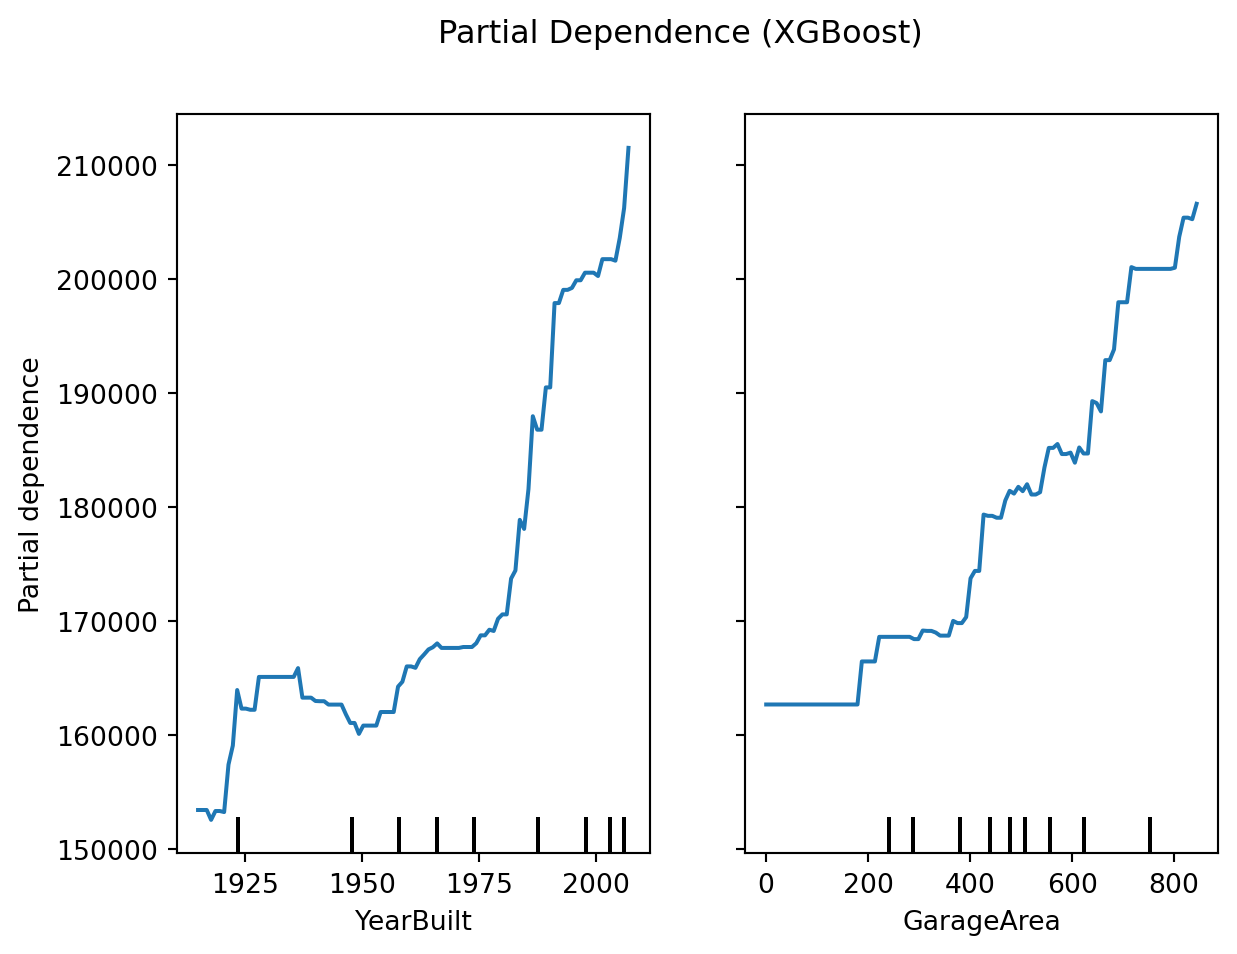

,Model,RMSE,MAE,MAPE,R2
0,XGBoost (Tuned),1.133839e+09,20819.921875,13.330445,0.772589


In [5]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=seed,
    n_jobs=-1
)

# Define tuning grid similar to R (eta = learning_rate, subsample, max_depth)
param_dist_xgb = {
    'n_estimators': [24, 50, 100, 200],
    'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': [1, 3, 5, 7, 10],
    'subsample': [0.25, 0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=cv,
    random_state=seed,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

xgb_random.fit(X_train, y_train)
xgb_best = xgb_random.best_estimator_
print("Best XGBoost Parameters:", xgb_random.best_params_)

# Importance plot with random variable
plot_importance(xgb_best, max_num_features=15, importance_type='gain')
plt.title("XGBoost: Variable Importance (with Random Baseline)")
plt.show()

# Partial dependence plots
plt.figure()
PartialDependenceDisplay.from_estimator(xgb_best, X_train, ['YearBuilt', 'GarageArea'])
plt.suptitle("Partial Dependence (XGBoost)")
plt.show()

# Metrics
pred_xgb = xgb_best.predict(X_test)
rmse_xgb = mean_squared_error(y_test, pred_xgb)
mae_xgb = mean_absolute_error(y_test, pred_xgb)
mape_xgb = np.mean(np.abs((y_test - pred_xgb) / y_test)) * 100
r2_xgb = r2_score(y_test, pred_xgb)

pd.DataFrame([["XGBoost (Tuned)", rmse_xgb, mae_xgb, mape_xgb, r2_xgb]],
             columns=["Model", "RMSE", "MAE", "MAPE", "R2"])

In [6]:
results = pd.DataFrame([
    ["Decision Tree", rmse_tree, mae_tree, mape_tree, r2_tree],
    ["Random Forest (Tuned)", rmse_rf, mae_rf, mape_rf, r2_rf],
    ["XGBoost (Tuned)", rmse_xgb, mae_xgb, mape_xgb, r2_xgb]
], columns=["Model", "RMSE", "MAE", "MAPE", "R2"]).sort_values("RMSE")
results

,Model,RMSE,MAE,MAPE,R2
1,Random Forest (Tuned),1.093313e+09,19889.772151,12.832756,0.780717
2,XGBoost (Tuned),1.133839e+09,20819.921875,13.330445,0.772589
0,Decision Tree,2.378377e+09,28465.348099,17.701235,0.522975
